<a href="https://colab.research.google.com/github/auviera/assignment/blob/main/Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [79]:
f=1800 #MHz
f1=900
f2=700
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)


In [73]:
print(d)

[396 461 230 202 563 374 497 269 312 317 648 426 625 615 206 472 644 430
 246 649 202 242 364 563 334 603 688 395 432 414 500 273 481 678 453 225
 454 439 376 320 413 354 480 206 641 467 664 339 658 682 472 558 432 485
 269 374 529 249 475 383 657 395 523 357 356 337 584 245 665 615 670 505
 294 322 634 435 543 330 269 278 484 432 447 202 582 508 318 484 482 530
 678 436 634 350 235 562 545 675 394 633 578 579 365 485 458 451 518 586
 219 299 679 356 465 486 398 261 626 504 268 501 392 393 654 497 634 237
 219 456 423 535 493 668 220 561 501 687 563 463 522 223 657 458 256 528
 396 285 525 323 609 560 278 471 464 699 249 579 244 676 642 279 354 305
 574 417 208 611 397 578 334 534 461 317 209 284 372 575 385 661 680 438
 456 436 605 328 560 267 326 694 502 532 645 617 626 412 503 450 430 468
 588 388]


In [74]:
y1=cos(f,loc,tower,user,d)
y2=cos(f,loc2,tower,user,d)
y3=cos(f,loc3,tower,user,d)

In [75]:
print(y1)
print(y2)
print(y3)

[179.26295647 181.40383683 171.60941197 169.78085477 184.21941631
 178.45780947 182.46300896 173.81576852 175.90464216 176.12859342
 186.20009722 180.29160587 185.69103403 185.46383172 170.05706436
 181.73600358 186.11287566 180.42325391 172.55674281 186.22181849
 169.78085477 172.32581571 178.07604525 184.21941631 176.86444747
 185.18626141 187.04383667 179.22734017 180.48861939 179.88911456
 182.54778096 174.02368724 182.00206845 186.83759232 181.15724431
 171.29981187 181.18830549 180.71503911 178.53293625 176.26127482
 179.85504867 177.68364557 181.97275265 170.05706436 186.04710322
 181.58598899 186.54368103 177.07375648 186.41581717 186.92045278
 181.73600358 184.0937577  180.48861939 182.11872533 173.81576852
 178.45780947 183.34196773 172.72748718 181.82525143 178.79276882
 186.39439323 179.22734017 183.18128647 177.80251748 177.76300487
 176.99040572 184.73527342 172.49936498 186.56487928 185.46383172
 186.67039466 182.68794368 175.06758974 176.34903982 185.89242926
 180.58610

In [76]:
d_sort=d[np.argsort(d)]
y1_sort=y1[np.argsort(d)]
y2_sort=y2[np.argsort(d)]
y3_sort=y3[np.argsort(d)]

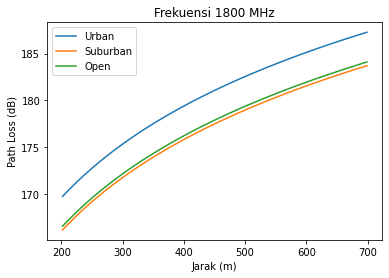

In [78]:
plt.figure()
plt.plot(d_sort,y1_sort, label="Urban")
plt.plot(d_sort,y2_sort, label="Suburban")
plt.plot(d_sort,y3_sort, label="Open")
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

In [81]:
freq1=cos(f,loc,tower,user,d)
freq2=cos(f1,loc,tower,user,d)
freq3=cos(f2,loc,tower,user,d)

In [82]:
d_sort=d[np.argsort(d)]
freq1_sort=freq1[np.argsort(d)]
freq2_sort=freq2[np.argsort(d)]
freq3_sort=freq3[np.argsort(d)]

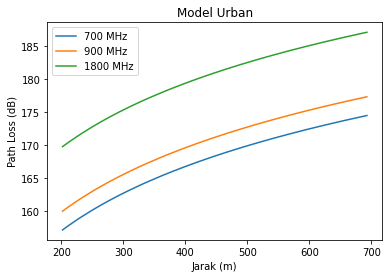

In [83]:
plt.figure()
plt.plot(d_sort,freq3_sort, label="700 MHz")
plt.plot(d_sort,freq2_sort, label="900 MHz")
plt.plot(d_sort,freq1_sort, label="1800 MHz")
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()